## Creating new dataframe for maping and analysis

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re

In [2]:
cars = pd.read_excel('fz27_202304.xlsx', sheet_name='FZ 27.16', skiprows=7, skipfooter=6)

In [3]:
cars = cars.drop('Unnamed: 0', axis = 1)

In [4]:
cars.head(20)

,Postleitzahl,gewerbliche Halterinnen und Halter,Unnamed: 3,Unnamed: 4,private Halterinnen und Halter,Unnamed: 6,Unnamed: 7
0,NaN,insgesamt,darunter,NaN,insgesamt,darunter,NaN
1,NaN,NaN,Elektro (BEV),Plug-in-Hybrid,NaN,Elektro (BEV),Plug-in-Hybrid
2,1067.0,3750,331,256,3821,53,34
3,1069.0,1525,78,133,6567,31,34
4,1097.0,1842,90,128,4361,39,27
5,1099.0,2241,89,167,8129,62,51
6,1108.0,295,25,20,3058,35,33
7,1109.0,1602,91,211,9452,90,73
8,1127.0,689,20,40,4676,26,15
9,1129.0,1682,69,61,7304,57,37


In [5]:
cars = cars.rename(columns={'Postleitzahl' : 'postcode', 'Unnamed: 3': 'commercial_BEV', 'Unnamed: 4': 'commercial_plug-in', 'Unnamed: 6': 'private_BEV', 'Unnamed: 7': 'private_plug-in'})

In [6]:
cars

,postcode,gewerbliche Halterinnen und Halter,commercial_BEV,commercial_plug-in,private Halterinnen und Halter,private_BEV,private_plug-in
0,NaN,insgesamt,darunter,NaN,insgesamt,darunter,NaN
1,NaN,NaN,Elektro (BEV),Plug-in-Hybrid,NaN,Elektro (BEV),Plug-in-Hybrid
2,1067.0,3750,331,256,3821,53,34
3,1069.0,1525,78,133,6567,31,34
4,1097.0,1842,90,128,4361,39,27
...,...,...,...,...,...,...,...
8198,99988.0,74,4,5,2459,42,28
8199,99991.0,73,.,3,2476,27,24
8200,99994.0,190,21,4,2784,18,17
8201,99996.0,50,.,.,1462,12,12


In [7]:
cars  = cars.drop(['gewerbliche Halterinnen und Halter', 'private Halterinnen und Halter'], axis = 1)
cars = cars.drop([0, 1]).reset_index(drop=True)

In [8]:
cars

,postcode,commercial_BEV,commercial_plug-in,private_BEV,private_plug-in
0,1067.0,331,256,53,34
1,1069.0,78,133,31,34
2,1097.0,90,128,39,27
3,1099.0,89,167,62,51
4,1108.0,25,20,35,33
...,...,...,...,...,...
8196,99988.0,4,5,42,28
8197,99991.0,.,3,27,24
8198,99994.0,21,4,18,17
8199,99996.0,.,.,12,12


In [9]:
# Replacing the empty values with 0
cars['commercial_BEV'] = pd.to_numeric(cars['commercial_BEV'], errors='coerce').fillna(0)
cars['commercial_plug-in'] = pd.to_numeric(cars['commercial_plug-in'], errors='coerce').fillna(0)
cars['private_BEV'] = pd.to_numeric(cars['private_BEV'], errors='coerce').fillna(0)
cars['private_plug-in'] = pd.to_numeric(cars['private_plug-in'], errors='coerce').fillna(0)

In [10]:
# Convert the columns to integer type
cars['commercial_BEV'] = cars['commercial_BEV'].astype('Int64')
cars['commercial_plug-in'] = cars['commercial_plug-in'].astype('Int64')
cars['private_BEV'] = cars['private_BEV'].astype('Int64')
cars['private_plug-in'] = cars['private_plug-in'].astype('Int64')

In [11]:
cars['commercial_BEV'].value_counts(dropna= False)

0       1195
4        256
5        250
6        231
7        223
        ... 
291        1
323        1
342        1
610        1
<NA>       0
Name: commercial_BEV, Length: 389, dtype: Int64

In [12]:
cars['eauto_total'] = cars[['commercial_BEV', 'commercial_plug-in', 'private_BEV', 'private_plug-in']].sum(axis=1)
cars

,postcode,commercial_BEV,commercial_plug-in,private_BEV,private_plug-in,eauto_total
0,1067.0,331,256,53,34,674.0
1,1069.0,78,133,31,34,276.0
2,1097.0,90,128,39,27,284.0
3,1099.0,89,167,62,51,369.0
4,1108.0,25,20,35,33,113.0
...,...,...,...,...,...,...
8196,99988.0,4,5,42,28,79.0
8197,99991.0,0,3,27,24,54.0
8198,99994.0,21,4,18,17,60.0
8199,99996.0,0,0,12,12,24.0


In [13]:
cars[cars['eauto_total'] == 0]

,postcode,commercial_BEV,commercial_plug-in,private_BEV,private_plug-in,eauto_total
63,1776.0,0,0,0,0,0.0
64,1778.0,0,0,0,0,0.0
95,1996.0,0,0,0,0,0.0
96,1998.0,0,0,0,0,0.0
151,3053.0,0,0,0,0,0.0
...,...,...,...,...,...,...
8106,98708.0,0,0,0,0,0.0
8107,98711.0,0,0,0,0,0.0
8108,98714.0,0,0,0,0,0.0
8111,98739.0,0,0,0,0,0.0


In [14]:
cars['eauto_total'].sum()

1889949.0

In [15]:
cars.shape

(8201, 6)

### Reading another dataframe

In [16]:
eautos = pd.read_csv('eautos_clean.csv')

C:\Users\valiu\AppData\Local\Temp\ipykernel_21668\2800528571.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  eautos = pd.read_csv('eautos_clean.csv')


In [17]:
eautos

,operator,street,haus_no,postcode,city,federal_land,county,latitude,longitude,power_connection_[kw],...,type_of_plug_1,p1_[kw],type_of_plug_2,p2_[kw],type_of_plug_3,p3_[kw],type_of_plug_4,p4_[kw],commissioning_year,commissioning_month
0,other Landkreis Alb-Donau-Kreis,Ennabeurer Weg,NaN,72535,other Landkreis Alb-Donau-Kreis,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.442398,9.659075,22.0,...,AC Steckdose Typ 2,NaN,AC Steckdose Typ 2,NaN,0,0.0,0,0.0,2020,January
1,other Landkreis Alb-Donau-Kreis,Albstraße,14,72535,other Landkreis Alb-Donau-Kreis,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.449353,9.672201,22.0,...,AC Steckdose Typ 2,NaN,AC Steckdose Typ 2,NaN,AC Steckdose Typ 2,NaN,AC Steckdose Typ 2,NaN,2022,November
2,other Landkreis Alb-Donau-Kreis,Parkplatz Campingplatz,NaN,72589,other Landkreis Alb-Donau-Kreis,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.510500,9.609000,22.0,...,AC Steckdose Typ 2,NaN,AC Steckdose Typ 2,NaN,0,0.0,0,0.0,2019,January
3,EnBW mobility+ AG und Co.KG,Hauptstraße,91c,73340,other Landkreis Alb-Donau-Kreis,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.578534,9.874840,98.0,...,AC Kupplung Typ 2,NaN,"DC Kupplung Combo, DC CHAdeMO",NaN,0,0.0,0,0.0,2019,March
4,SWU Energie GmbH,Sterngasse,6,88481,other Landkreis Alb-Donau-Kreis,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.179959,10.076977,22.0,...,AC Steckdose Typ 2,NaN,0,0,0,0.0,0,0.0,2022,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,other Landkreis Weimarer Land,Würzburger Straße,9,99510,other Landkreis Weimarer Land,Thüringen,Landkreis Weimarer Land,51.013750,11.517313,11.0,...,AC Kupplung Typ 2,NaN,0,0.0,0,0.0,0,0.0,2023,January
38413,TEAG Mobil GmbH,Dorfstraße,101,99510,other Landkreis Weimarer Land,Thüringen,Landkreis Weimarer Land,51.060798,11.565503,300.0,...,DC Kupplung Combo,NaN,DC Kupplung Combo,NaN,0,0.0,0,0.0,2022,September
38414,other Landkreis Weimarer Land,Dorfstr.,NaN,99510,other Landkreis Weimarer Land,Thüringen,Landkreis Weimarer Land,51.060770,11.565560,300.0,...,DC Kupplung Combo,NaN,DC Kupplung Combo,NaN,0,0.0,0,0.0,2022,January
38415,other Landkreis Weimarer Land,Wunderwaldstraße,2a,99518,other Landkreis Weimarer Land,Thüringen,Landkreis Weimarer Land,51.092527,11.628574,44.0,...,AC Steckdose Typ 2,NaN,AC Steckdose Typ 2,NaN,0,0.0,0,0.0,2018,August


In [18]:
postcode_counts = eautos.groupby('postcode').agg(count=('postcode', 'size'), sum_charging_points=('number_of_charging_points', 'sum')).reset_index()
postcode_counts.columns = ['postcode', 'count_stations', 'sum_charging_points']

postcode_info = eautos[['postcode', 'city', 'federal_land']].drop_duplicates()

new_eautos = pd.merge(postcode_counts, postcode_info, on='postcode', how='left')

In [19]:
new_eautos

,postcode,count_stations,sum_charging_points,city,federal_land
0,1036,1,1,Berlin,Berlin
1,1062,1,2,Berlin,Berlin
2,1067,26,51,Dresden,Sachsen
3,1069,46,95,Dresden,Sachsen
4,1097,19,37,Dresden,Sachsen
...,...,...,...,...,...
6438,99955,1,2,other Landkreis Unstrut-Hainich-Kreis,Thüringen
6439,99974,13,25,other Landkreis Unstrut-Hainich-Kreis,Thüringen
6440,99976,1,2,other Landkreis Unstrut-Hainich-Kreis,Thüringen
6441,99988,1,2,other Landkreis Unstrut-Hainich-Kreis,Thüringen


In [20]:
#double checking
eautos[eautos['postcode'] == 99991]

,operator,street,haus_no,postcode,city,federal_land,county,latitude,longitude,power_connection_[kw],...,type_of_plug_1,p1_[kw],type_of_plug_2,p2_[kw],type_of_plug_3,p3_[kw],type_of_plug_4,p4_[kw],commissioning_year,commissioning_month
38367,TEAG Mobil GmbH,Mühlhäuser Str.,18,99991,other Landkreis Unstrut-Hainich-Kreis,Thüringen,Landkreis Unstrut-Hainich-Kreis,51.150860,10.554970,86.0,...,"DC Kupplung Combo, DC CHAdeMO",NaN,AC Kupplung Typ 2,NaN,0,0.0,0,0.0,2017,November
38368,TEAG Mobil GmbH,Hauptstraße,46,99991,other Landkreis Unstrut-Hainich-Kreis,Thüringen,Landkreis Unstrut-Hainich-Kreis,51.163845,10.586071,30.0,...,AC Steckdose Typ 2,NaN,AC Steckdose Typ 2,NaN,0,0.0,0,0.0,2019,April


In [21]:
new_eautos[new_eautos['postcode'] == 99991]

,postcode,count_stations,sum_charging_points,city,federal_land
6442,99991,2,4,other Landkreis Unstrut-Hainich-Kreis,Thüringen


In [22]:
new_eautos.isna().sum()

postcode               0
count_stations         0
sum_charging_points    0
city                   0
federal_land           0
dtype: int64

In [23]:
duplicates = new_eautos['postcode'].duplicated(keep=False)
duplicate_rows = new_eautos[duplicates]
duplicate_rows

,postcode,count_stations,sum_charging_points,city,federal_land
8,1127,7,14,Dresden,Sachsen
9,1127,7,14,Leipzig,Sachsen
71,1824,5,10,other Landkreis Amberg-Sulzbach,Bayern
72,1824,5,10,other Landkreis Bautzen,Sachsen
73,1824,5,10,other Landkreis Sächsische Schweiz-Osterzgebirge,Sachsen
...,...,...,...,...,...
6265,97456,2,4,other Landkreis Rhein-Lahn-Kreis,Rheinland-Pfalz
6340,97999,4,8,other Landkreis Main-Tauber-Kreis,Baden-Württemberg
6341,97999,4,8,other Landkreis Rhein-Pfalz-Kreis,Rheinland-Pfalz
6399,99428,4,12,Weimar,Thüringen


In [24]:
new_eautos = new_eautos.drop_duplicates(subset='postcode', keep='last') 
new_eautos

,postcode,count_stations,sum_charging_points,city,federal_land
0,1036,1,1,Berlin,Berlin
1,1062,1,2,Berlin,Berlin
2,1067,26,51,Dresden,Sachsen
3,1069,46,95,Dresden,Sachsen
4,1097,19,37,Dresden,Sachsen
...,...,...,...,...,...
6438,99955,1,2,other Landkreis Unstrut-Hainich-Kreis,Thüringen
6439,99974,13,25,other Landkreis Unstrut-Hainich-Kreis,Thüringen
6440,99976,1,2,other Landkreis Unstrut-Hainich-Kreis,Thüringen
6441,99988,1,2,other Landkreis Unstrut-Hainich-Kreis,Thüringen


## Joining dataframes

In [25]:
merged_df = new_eautos.merge(cars, on='postcode', how='right')

In [26]:
merged_df

,postcode,count_stations,sum_charging_points,city,federal_land,commercial_BEV,commercial_plug-in,private_BEV,private_plug-in,eauto_total
0,1067.0,26.0,51.0,Dresden,Sachsen,331,256,53,34,674.0
1,1069.0,46.0,95.0,Dresden,Sachsen,78,133,31,34,276.0
2,1097.0,19.0,37.0,Dresden,Sachsen,90,128,39,27,284.0
3,1099.0,14.0,29.0,Dresden,Sachsen,89,167,62,51,369.0
4,1108.0,4.0,8.0,Dresden,Sachsen,25,20,35,33,113.0
...,...,...,...,...,...,...,...,...,...,...
8196,99988.0,1.0,2.0,other Landkreis Unstrut-Hainich-Kreis,Thüringen,4,5,42,28,79.0
8197,99991.0,2.0,4.0,other Landkreis Unstrut-Hainich-Kreis,Thüringen,0,3,27,24,54.0
8198,99994.0,NaN,NaN,NaN,NaN,21,4,18,17,60.0
8199,99996.0,NaN,NaN,NaN,NaN,0,0,12,12,24.0


In [27]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8201 entries, 0 to 8200
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   postcode             8201 non-null   float64
 1   count_stations       6103 non-null   float64
 2   sum_charging_points  6103 non-null   float64
 3   city                 6103 non-null   object 
 4   federal_land         6103 non-null   object 
 5   commercial_BEV       8201 non-null   Int64  
 6   commercial_plug-in   8201 non-null   Int64  
 7   private_BEV          8201 non-null   Int64  
 8   private_plug-in      8201 non-null   Int64  
 9   eauto_total          8201 non-null   float64
dtypes: Int64(4), float64(4), object(2)
memory usage: 736.8+ KB


In [28]:
#double checking if I merged correctly
print(merged_df['eauto_total'].sum())
print (cars['eauto_total'].sum())

1889949.0
1889949.0


In [29]:
#checking the values
merged_df[merged_df['eauto_total'] == 0]

,postcode,count_stations,sum_charging_points,city,federal_land,commercial_BEV,commercial_plug-in,private_BEV,private_plug-in,eauto_total
63,1776.0,1.0,2.0,other Landkreis Sächsische Schweiz-Osterzgebirge,Sachsen,0,0,0,0,0.0
64,1778.0,NaN,NaN,NaN,NaN,0,0,0,0,0.0
95,1996.0,NaN,NaN,NaN,NaN,0,0,0,0,0.0
96,1998.0,2.0,4.0,other Landkreis Oberspreewald-Lausitz,Brandenburg,0,0,0,0,0.0
151,3053.0,NaN,NaN,NaN,NaN,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
8106,98708.0,1.0,2.0,other Landkreis Ilm-Kreis,Thüringen,0,0,0,0,0.0
8107,98711.0,1.0,2.0,other Landkreis Ilm-Kreis,Thüringen,0,0,0,0,0.0
8108,98714.0,NaN,NaN,NaN,NaN,0,0,0,0,0.0
8111,98739.0,NaN,NaN,NaN,NaN,0,0,0,0,0.0


In [30]:
merged_df['commercial_plug-in'].value_counts(dropna = False)

0       1435
4        256
5        252
7        219
3        215
        ... 
326        1
595        1
494        1
1124       1
<NA>       0
Name: commercial_plug-in, Length: 471, dtype: Int64

In [31]:
merged_df['postcode'] = merged_df['postcode'].astype(int)

In [32]:
#Replecing Nan values in count_stations and sum_charging_points with 0
merged_df['count_stations'] = merged_df['count_stations'].fillna(0)
merged_df['sum_charging_points'] = merged_df['sum_charging_points'].fillna(0)

In [33]:
merged_df

,postcode,count_stations,sum_charging_points,city,federal_land,commercial_BEV,commercial_plug-in,private_BEV,private_plug-in,eauto_total
0,1067,26.0,51.0,Dresden,Sachsen,331,256,53,34,674.0
1,1069,46.0,95.0,Dresden,Sachsen,78,133,31,34,276.0
2,1097,19.0,37.0,Dresden,Sachsen,90,128,39,27,284.0
3,1099,14.0,29.0,Dresden,Sachsen,89,167,62,51,369.0
4,1108,4.0,8.0,Dresden,Sachsen,25,20,35,33,113.0
...,...,...,...,...,...,...,...,...,...,...
8196,99988,1.0,2.0,other Landkreis Unstrut-Hainich-Kreis,Thüringen,4,5,42,28,79.0
8197,99991,2.0,4.0,other Landkreis Unstrut-Hainich-Kreis,Thüringen,0,3,27,24,54.0
8198,99994,0.0,0.0,NaN,NaN,21,4,18,17,60.0
8199,99996,0.0,0.0,NaN,NaN,0,0,12,12,24.0


In [34]:
merged_df[merged_df['count_stations']==0]

,postcode,count_stations,sum_charging_points,city,federal_land,commercial_BEV,commercial_plug-in,private_BEV,private_plug-in,eauto_total
13,1187,0.0,0.0,NaN,NaN,32,72,65,51,220.0
40,1594,0.0,0.0,NaN,NaN,4,6,22,22,54.0
43,1616,0.0,0.0,NaN,NaN,0,9,11,19,39.0
59,1762,0.0,0.0,NaN,NaN,0,3,8,0,11.0
64,1778,0.0,0.0,NaN,NaN,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
8192,99958,0.0,0.0,NaN,NaN,7,0,19,13,39.0
8195,99986,0.0,0.0,NaN,NaN,9,4,46,28,87.0
8198,99994,0.0,0.0,NaN,NaN,21,4,18,17,60.0
8199,99996,0.0,0.0,NaN,NaN,0,0,12,12,24.0


In [35]:
merged_df['city'].isna().sum()

2098

### postcode info

In [36]:
postcode = pd.read_excel('PLZ.xlsx')

In [37]:
postcode

,PLZ,Bundesland,Kreis,Typ
0,1067,Sachsen,Dresden,Stadt
1,1069,Sachsen,Dresden,Stadt
2,1097,Sachsen,Dresden,Stadt
3,1099,Sachsen,Dresden,Stadt
4,1108,Sachsen,Dresden,Stadt
...,...,...,...,...
8191,99988,Thüringen,Unstrut-Hainich-Kreis,Kreis
8192,99991,Thüringen,Unstrut-Hainich-Kreis,Kreis
8193,99994,Thüringen,Unstrut-Hainich-Kreis,Kreis
8194,99996,Thüringen,Unstrut-Hainich-Kreis,Kreis


In [38]:
# some duplicate values
postcode = postcode.drop('Typ', axis=1)

In [39]:
postcode.duplicated().sum()

0

In [40]:
postcode = postcode.rename(columns={'PLZ' : 'postcode', 'Kreis': 'city', 'Bundesland' : 'federal_land'})

In [41]:
postcode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8196 entries, 0 to 8195
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   postcode      8196 non-null   int64 
 1   federal_land  8196 non-null   object
 2   city          8196 non-null   object
dtypes: int64(1), object(2)
memory usage: 192.2+ KB


In [42]:
#replacing NaN values in the merged df with information from postcode dataframe
merged_df.loc[merged_df['city'].isna(), 'city'] = merged_df.loc[merged_df['city'].isna(), 'postcode'].map(postcode.set_index('postcode')['city'])

In [43]:
merged_df.loc[merged_df['federal_land'].isna(), 'federal_land'] = merged_df.loc[merged_df['federal_land'].isna(), 'postcode'].map(postcode.set_index('postcode')['federal_land'])

In [44]:
merged_df

,postcode,count_stations,sum_charging_points,city,federal_land,commercial_BEV,commercial_plug-in,private_BEV,private_plug-in,eauto_total
0,1067,26.0,51.0,Dresden,Sachsen,331,256,53,34,674.0
1,1069,46.0,95.0,Dresden,Sachsen,78,133,31,34,276.0
2,1097,19.0,37.0,Dresden,Sachsen,90,128,39,27,284.0
3,1099,14.0,29.0,Dresden,Sachsen,89,167,62,51,369.0
4,1108,4.0,8.0,Dresden,Sachsen,25,20,35,33,113.0
...,...,...,...,...,...,...,...,...,...,...
8196,99988,1.0,2.0,other Landkreis Unstrut-Hainich-Kreis,Thüringen,4,5,42,28,79.0
8197,99991,2.0,4.0,other Landkreis Unstrut-Hainich-Kreis,Thüringen,0,3,27,24,54.0
8198,99994,0.0,0.0,Unstrut-Hainich-Kreis,Thüringen,21,4,18,17,60.0
8199,99996,0.0,0.0,Unstrut-Hainich-Kreis,Thüringen,0,0,12,12,24.0


In [45]:
merged_df.isna().sum()

postcode                0
count_stations          0
sum_charging_points     0
city                   15
federal_land           15
commercial_BEV          0
commercial_plug-in      0
private_BEV             0
private_plug-in         0
eauto_total             0
dtype: int64

In [46]:
merged_df[merged_df['city'].isna()]

,postcode,count_stations,sum_charging_points,city,federal_land,commercial_BEV,commercial_plug-in,private_BEV,private_plug-in,eauto_total
211,4430,0.0,0.0,NaN,NaN,0,0,0,0,0.0
225,4574,0.0,0.0,NaN,NaN,0,0,0,0,0.0
227,4579,0.0,0.0,NaN,NaN,0,0,0,0,0.0
338,6507,0.0,0.0,NaN,NaN,0,0,0,0,0.0
490,8265,0.0,0.0,NaN,NaN,0,0,0,0,0.0
1977,27632,0.0,0.0,NaN,NaN,0,0,0,0,0.0
1978,27637,0.0,0.0,NaN,NaN,0,0,0,0,0.0
1979,27638,0.0,0.0,NaN,NaN,0,0,0,0,0.0
2200,31085,0.0,0.0,NaN,NaN,0,0,0,0,0.0
2201,31087,0.0,0.0,NaN,NaN,0,0,0,0,0.0


In [47]:
# manually replacing some larger values for city and federal land
merged_df.loc[merged_df['postcode'] == 99331, 'city'] = 'Geratal'
merged_df.loc[merged_df['postcode'] == 99331, 'federal_land'] = 'Thüringen'

In [48]:
merged_df.loc[merged_df['postcode'] == 39628, 'city'] = 'Bismark'
merged_df.loc[merged_df['postcode'] == 39628, 'federal_land'] = 'Sachsen-Anhalt'

In [49]:
#dropping the remaining rows with NaNs
merged_df = merged_df.dropna(subset=['city'])

In [50]:
merged_df.isna().sum()

postcode               0
count_stations         0
sum_charging_points    0
city                   0
federal_land           0
commercial_BEV         0
commercial_plug-in     0
private_BEV            0
private_plug-in        0
eauto_total            0
dtype: int64

In [51]:
merged_df

,postcode,count_stations,sum_charging_points,city,federal_land,commercial_BEV,commercial_plug-in,private_BEV,private_plug-in,eauto_total
0,1067,26.0,51.0,Dresden,Sachsen,331,256,53,34,674.0
1,1069,46.0,95.0,Dresden,Sachsen,78,133,31,34,276.0
2,1097,19.0,37.0,Dresden,Sachsen,90,128,39,27,284.0
3,1099,14.0,29.0,Dresden,Sachsen,89,167,62,51,369.0
4,1108,4.0,8.0,Dresden,Sachsen,25,20,35,33,113.0
...,...,...,...,...,...,...,...,...,...,...
8196,99988,1.0,2.0,other Landkreis Unstrut-Hainich-Kreis,Thüringen,4,5,42,28,79.0
8197,99991,2.0,4.0,other Landkreis Unstrut-Hainich-Kreis,Thüringen,0,3,27,24,54.0
8198,99994,0.0,0.0,Unstrut-Hainich-Kreis,Thüringen,21,4,18,17,60.0
8199,99996,0.0,0.0,Unstrut-Hainich-Kreis,Thüringen,0,0,12,12,24.0


### Some desctiptive analysis

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

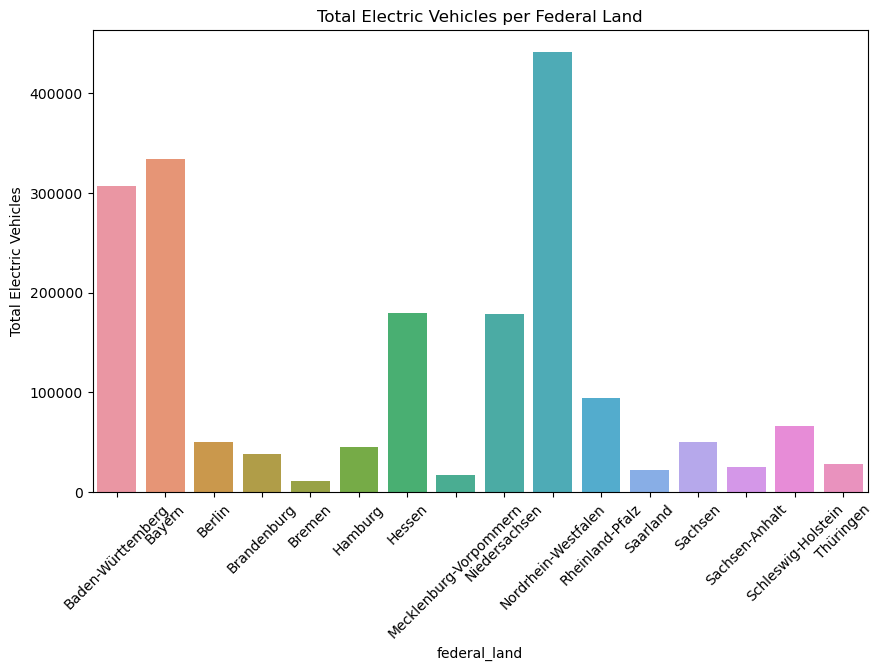

In [53]:
grouped_df = merged_df.groupby('federal_land')['eauto_total'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='federal_land', y='eauto_total')
plt.xlabel('federal_land')
plt.ylabel('Total Electric Vehicles')
plt.title('Total Electric Vehicles per Federal Land')
plt.xticks(rotation=45)
plt.show()

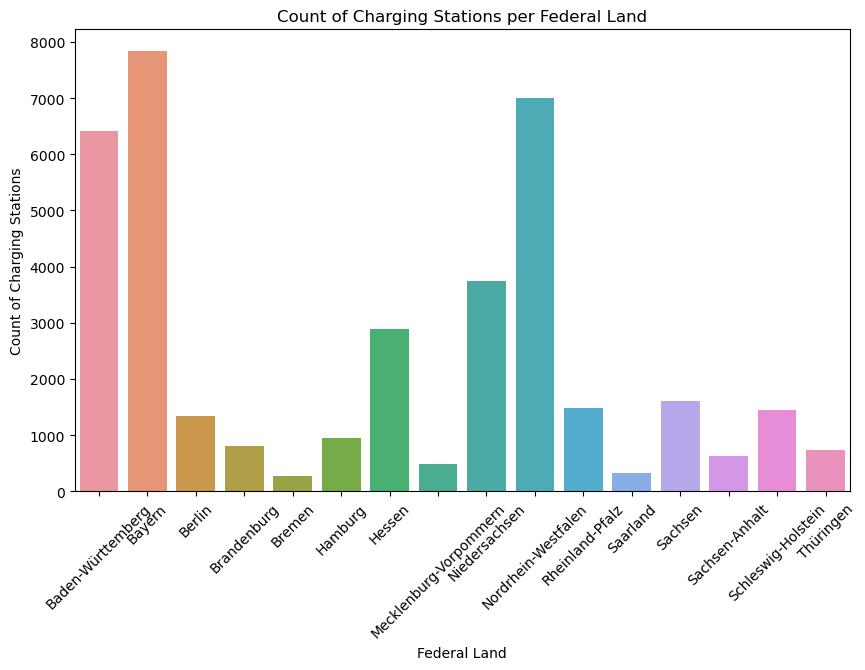

In [54]:
grouped_df = merged_df.groupby('federal_land')['count_stations'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='federal_land', y='count_stations')
plt.xlabel('Federal Land')
plt.ylabel('Count of Charging Stations')
plt.title('Count of Charging Stations per Federal Land')
plt.xticks(rotation=45)
plt.show()

In [55]:
merged_df['federal_land'].value_counts()

Bayern                    2057
Baden-Württemberg         1189
Nordrhein-Westfalen        866
Niedersachsen              810
Rheinland-Pfalz            663
Hessen                     540
Schleswig-Holstein         446
Sachsen                    388
Thüringen                  226
Brandenburg                212
Sachsen-Anhalt             203
Berlin                     190
Mecklenburg-Vorpommern     190
Hamburg                     99
Saarland                    69
Bremen                      40
Name: federal_land, dtype: int64

### Ecars per ownership group

In [56]:
merged_df.columns

Index(['postcode', 'count_stations', 'sum_charging_points', 'city',
       'federal_land', 'commercial_BEV', 'commercial_plug-in', 'private_BEV',
       'private_plug-in', 'eauto_total'],
      dtype='object')

In [57]:
 merged_df['private_BEV'].sum()

630619

In [58]:
 merged_df['private_plug-in'].sum()

375266

In [59]:
private_cars = merged_df['private_BEV'] + merged_df['private_plug-in']
private_cars.sum()

1005885

In [60]:
merged_df['commercial_BEV'].sum()

411857

In [61]:
merged_df['commercial_plug-in'].sum()

472195

In [62]:
commercial_cars = merged_df['commercial_BEV'] + merged_df['commercial_plug-in']
commercial_cars.sum()

884052

In [63]:
top_cities = merged_df['city'].value_counts().head(50).index.tolist()

df_sorted = merged_df[merged_df['city'].isin(top_cities)].copy()

In [64]:
df_sorted['commercial_BEV'].sum()

132516

In [65]:
merged_df.to_csv('per_postcode_data.csv')

In [66]:
berlin_data = merged_df[merged_df['city'] == 'Berlin']

In [67]:
berlin_data

,postcode,count_stations,sum_charging_points,city,federal_land,commercial_BEV,commercial_plug-in,private_BEV,private_plug-in,eauto_total
630,10115,18.0,34.0,Berlin,Berlin,114,203,101,85,503.0
631,10117,29.0,56.0,Berlin,Berlin,332,570,91,61,1054.0
632,10119,4.0,8.0,Berlin,Berlin,78,68,69,39,254.0
633,10178,17.0,36.0,Berlin,Berlin,153,267,27,21,468.0
635,10243,23.0,44.0,Berlin,Berlin,115,98,47,44,304.0
...,...,...,...,...,...,...,...,...,...,...
819,14197,8.0,14.0,Berlin,Berlin,52,46,39,44,181.0
820,14199,7.0,13.0,Berlin,Berlin,61,70,111,64,306.0
883,15366,12.0,21.0,Berlin,Brandenburg,138,127,365,304,934.0
893,15562,2.0,4.0,Berlin,Brandenburg,27,32,39,41,139.0


In [68]:
berlin_data.to_csv('berlin_data.csv')

## Number of electric autos per year 2018-2023

### Data for 2023

In [69]:
ecars_2023= pd.read_excel('fz27_202304.xlsx', sheet_name='FZ 27.5', skiprows=7, skipfooter=5) 

In [70]:
ecars_2023

,Unnamed: 0,Land,Haltergruppe,Benzin,Diesel,Gas insgesamt,Elektro (BEV),Hybrid \ninsgesamt,darunter \nPlug-in,Sonstige,Personenkraftwagen insgesamt
0,NaN,Baden-Württemberg,Gewerbliche Halterinnen und Halter,243760,354062,3553,78549,169750,85820,183,849857
1,NaN,NaN,Private Halterinnen \nund Halter,4022723,1671626,39249,97888,202762,59625,1089,6035337
2,NaN,Baden-Württemberg zusammen,NaN,4266659,2025854,42802,176483,372652,145523,1272,6885722
3,NaN,Bayern,Gewerbliche Halterinnen und Halter,322864,436125,3879,83577,217292,92221,283,1064020
4,NaN,NaN,Private Halterinnen \nund Halter,4589380,2266047,44120,120337,236297,64847,1184,7257365
5,NaN,Bayern zusammen,NaN,4912515,2702304,48015,203922,453610,157073,1467,8321833
6,NaN,Berlin,Gewerbliche Halterinnen und Halter,65968,61225,1133,14555,41480,15813,146,184507
7,NaN,NaN,Private Halterinnen \nund Halter,783265,203847,12113,12188,47012,10141,313,1058738
8,NaN,Berlin zusammen,NaN,849355,265159,13248,26755,88524,25961,459,1243500
9,NaN,Brandenburg,Gewerbliche Halterinnen und Halter,40395,53508,903,6271,15239,6699,30,116346


In [71]:
#Created clean_up function as I need to do similar steps to several dataframes
def clean_up(df, year):
    df = df.drop(['Unnamed: 0'], axis=1)
    df = df.drop(df.index[2::3]).reset_index(drop=True)
    df = df.drop(df.index[32:]).reset_index(drop=True)
    df = df.rename(columns={'Land': 'federal_land', 'Haltergruppe': 'owner_group', 'Benzin': 'petrol', 'Diesel': 'diesel', 'Gas insgesamt': 'gas', 'Elektro (BEV)': 'electro', 'darunter \nPlug-in': 'plug-in', 'Sonstige': 'other'})
    df = df.drop(['Hybrid \ninsgesamt',  'Personenkraftwagen insgesamt'], axis=1)
    df.loc[1::2, 'federal_land'] = df.loc[::2, 'federal_land'].values
    df.insert(0, 'year', year)
    df.owner_group.replace({'Gewerbliche Halterinnen und Halter': 'commercial', 'Private Halterinnen \nund Halter': 'private'}, inplace=True)
    return df

In [72]:
ecars_2023 = clean_up(ecars_2023, 2023)

In [73]:
ecars_2023

,year,federal_land,owner_group,petrol,diesel,gas,electro,plug-in,other
0,2023,Baden-Württemberg,commercial,243760,354062,3553,78549,85820,183
1,2023,Baden-Württemberg,private,4022723,1671626,39249,97888,59625,1089
2,2023,Bayern,commercial,322864,436125,3879,83577,92221,283
3,2023,Bayern,private,4589380,2266047,44120,120337,64847,1184
4,2023,Berlin,commercial,65968,61225,1133,14555,15813,146
5,2023,Berlin,private,783265,203847,12113,12188,10141,313
6,2023,Brandenburg,commercial,40395,53508,903,6271,6699,30
7,2023,Brandenburg,private,936728,347484,12736,15014,10841,446
8,2023,Bremen,commercial,12513,17895,207,3011,3891,7
9,2023,Bremen,private,176018,68799,2571,2419,1743,49


### Some EDA for the presenation

In [74]:
# No. of the EV(fully electric vehicles)
EV_total = ecars_2023['electro'].sum()
EV_total

1076658

In [75]:
PHEV_total = ecars_2023['plug-in'].sum()
PHEV_total

874612

In [76]:
total = EV_total+ PHEV_total
total

1951270

In [77]:
ecars_2023['owner_group'].value_counts()

commercial    16
private       16
Name: owner_group, dtype: int64

### Data for 2022

In [78]:
ecars_2022 = pd.read_excel('fz27_202204.xlsx', sheet_name='FZ 27.5', skiprows=7, skipfooter=5)

In [79]:
ecars_2022 = clean_up(ecars_2022, 2022)

In [80]:
ecars_2022['owner_group'] = ecars_2022['owner_group'].replace({'Gewerbliche Halter': 'commercial', 'Private Halter': 'private'})

In [81]:
ecars_2022

,year,federal_land,owner_group,petrol,diesel,gas,electro,plug-in,other
0,2022,Baden-Württemberg,commercial,249810,380326,3660,52487,64398,163
1,2022,Baden-Württemberg,private,4071943,1706873,39625,64332,43485,1116
2,2022,Bayern,commercial,318591,463665,3951,53151,65764,214
3,2022,Bayern,private,4627677,2318911,44509,75083,45902,1181
4,2022,Berlin,commercial,64085,65177,1206,9741,11743,85
5,2022,Berlin,private,805915,207090,12813,8383,7477,322
6,2022,Brandenburg,commercial,40651,55201,907,4184,4958,28
7,2022,Brandenburg,private,948542,352385,12989,9405,7365,462
8,2022,Bremen,commercial,12690,19135,219,1850,2875,7
9,2022,Bremen,private,179394,69368,2650,1571,1283,47


### Data for 2021

In [82]:
ecars_2021 = pd.read_excel('fz27_202104.xlsx', sheet_name='FZ 27.6', skiprows=7, skipfooter=5)

In [83]:
ecars_2021 = clean_up(ecars_2021, 2021)

In [84]:
ecars_2021['owner_group'] = ecars_2021['owner_group'].replace({'Gewerbliche Halter': 'commercial', 'Private Halter': 'private'})

In [85]:
ecars_2021

,year,federal_land,owner_group,petrol,diesel,gas,electro,plug-in,other
0,2021,Baden-Württemberg,commercial,265666,416975,3970,30615,39520,145
1,2021,Baden-Württemberg,private,4119828,1725525,39347,34255,23438,1138
2,2021,Bayern,commercial,332133,510516,4139,30285,41823,203
3,2021,Bayern,private,4677985,2329619,45228,39365,24399,1216
4,2021,Berlin,commercial,67018,70156,1204,5907,6986,75
5,2021,Berlin,private,821600,208210,13346,4491,4066,320
6,2021,Brandenburg,commercial,41921,57696,919,2508,2705,21
7,2021,Brandenburg,private,959690,350942,13321,4430,3793,470
8,2021,Bremen,commercial,13314,20830,245,1001,1842,8
9,2021,Bremen,private,182452,68889,2747,800,649,48


### Data for 2020

In [86]:
ecars_2020 = pd.read_excel('fz27_202004_xlsx.xlsx', sheet_name='FZ 27.6', skiprows=7, skipfooter=5)

In [87]:
ecars_2020 = clean_up(ecars_2020, 2020)

In [88]:
ecars_2020['owner_group'] = ecars_2020['owner_group'].replace({'Gewerbliche Halter': 'commercial', 'Private Halter': 'private'})

In [89]:
ecars_2020 = ecars_2020.rename(columns={'Elektro': 'electro'})

In [90]:
ecars_2020

,year,federal_land,owner_group,petrol,diesel,gas,electro,plug-in,other
0,2020,Baden-Württemberg,commercial,283985,460136,4118,13642,13602,139
1,2020,Baden-Württemberg,private,4104691,1720680,40376,14345,8677,1138
2,2020,Bayern,commercial,368209,561979,4337,16822,16231,155
3,2020,Bayern,private,4669601,2296729,47427,17701,10141,1252
4,2020,Berlin,commercial,70844,78794,1331,3387,2651,67
5,2020,Berlin,private,815405,206353,13733,1942,1587,320
6,2020,Brandenburg,commercial,42348,59699,969,1187,878,21
7,2020,Brandenburg,private,961777,342609,13955,1818,1529,500
8,2020,Bremen,commercial,13983,22802,260,562,556,7
9,2020,Bremen,private,182263,66850,2878,298,218,49


### Data for 2019

In [91]:
ecars_2019 = pd.read_excel('fz27_201904_xlsx.xlsx', sheet_name='FZ 27.6', skiprows=7, skipfooter=5)

In [92]:
ecars_2019 = clean_up(ecars_2019, 2019)

In [93]:
ecars_2019['owner_group'] = ecars_2019['owner_group'].replace({'Gewerbliche Halter': 'commercial', 'Private Halter': 'private'})

In [94]:
ecars_2019 = ecars_2019.rename(columns={'Elektro': 'electro'})

In [95]:
ecars_2019

,year,federal_land,owner_group,petrol,diesel,gas,electro,plug-in,other
0,2019,Baden-Württemberg,commercial,272361,480462,3902,8556,7573,155
1,2019,Baden-Württemberg,private,4050019,1736365,41435,9795,6166,1160
2,2019,Bayern,commercial,371083,597370,4338,11453,8078,147
3,2019,Bayern,private,4635026,2271130,50340,12078,7386,1281
4,2019,Berlin,commercial,67425,83189,1388,2053,1392,39
5,2019,Berlin,private,812232,212403,14304,1137,1103,326
6,2019,Brandenburg,commercial,41270,61672,961,831,439,20
7,2019,Brandenburg,private,959897,336210,14795,1098,963,511
8,2019,Bremen,commercial,13755,24466,306,363,254,8
9,2019,Bremen,private,182518,65946,3012,177,159,49


### Data for 2018

In [96]:
#pip install xlrd

In [97]:
ecars_2018 = pd.read_excel('fz27_2018_xls.xls', sheet_name='FZ 27.7', skiprows=7, skipfooter=5)

In [98]:
ecars_2018 = clean_up(ecars_2018, 2018)

In [99]:
ecars_2018['owner_group'] = ecars_2018['owner_group'].replace({'Gewerbliche Halter': 'commercial', 'Private Halter': 'private'})

In [100]:
ecars_2018 = ecars_2018.rename(columns={'Elektro': 'electro'})

In [101]:
ecars_2018

,year,federal_land,owner_group,petrol,diesel,gas,electro,plug-in,other
0,2018,Baden-Württemberg,commercial,258246,492236,3985,6348,6473,174
1,2018,Baden-Württemberg,private,3998142,1759556,41936,6808,4324,1190
2,2018,Bayern,commercial,362351,610974,4620,7831,7269,164
3,2018,Bayern,private,4607560,2259934,52366,8493,5461,1311
4,2018,Berlin,commercial,65027,85795,1452,1698,1090,59
5,2018,Berlin,private,802822,218173,14401,745,746,328
6,2018,Brandenburg,commercial,40151,63105,1026,515,375,19
7,2018,Brandenburg,private,956637,331634,15433,774,640,513
8,2018,Bremen,commercial,12760,25259,316,256,218,7
9,2018,Bremen,private,181997,65839,3141,115,115,48


### Some descriptive statistics

### Creating the big dataframe for model

In [102]:
ecars_total = pd.concat([ecars_2018, ecars_2019, ecars_2020, ecars_2021, ecars_2022, ecars_2023], ignore_index=True)

In [103]:
ecars_total

,year,federal_land,owner_group,petrol,diesel,gas,electro,plug-in,other
0,2018,Baden-Württemberg,commercial,258246,492236,3985,6348,6473,174
1,2018,Baden-Württemberg,private,3998142,1759556,41936,6808,4324,1190
2,2018,Bayern,commercial,362351,610974,4620,7831,7269,164
3,2018,Bayern,private,4607560,2259934,52366,8493,5461,1311
4,2018,Berlin,commercial,65027,85795,1452,1698,1090,59
...,...,...,...,...,...,...,...,...,...
187,2023,Sachsen-Anhalt,private,782145,283909,7248,7479,6279,435
188,2023,Schleswig-Holstein,commercial,46525,70990,642,14809,12620,81
189,2023,Schleswig-Holstein,private,998165,499715,10614,26508,11477,292
190,2023,Thüringen,commercial,30231,45621,363,5518,5666,26


In [104]:
ecars_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          192 non-null    int64 
 1   federal_land  192 non-null    object
 2   owner_group   192 non-null    object
 3   petrol        192 non-null    int64 
 4   diesel        192 non-null    int64 
 5   gas           192 non-null    int64 
 6   electro       192 non-null    object
 7   plug-in       192 non-null    object
 8   other         192 non-null    object
dtypes: int64(4), object(5)
memory usage: 13.6+ KB


In [105]:
ecars_total.columns

Index(['year', 'federal_land', 'owner_group', 'petrol', 'diesel', 'gas',
       'electro', 'plug-in', 'other'],
      dtype='object')

In [106]:
columns_to_convert = ['electro', 'plug-in', 'other']
ecars_total[columns_to_convert] = ecars_total[columns_to_convert].astype('int64') #adjusting data types

In [107]:
ecars_total.to_csv('ecars_total.csv')

### X-y split

In [108]:
y = ecars_total['electro'] #defining x-y split
X = ecars_total.drop(['electro'], axis=1)

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
X_test

,year,federal_land,owner_group,petrol,diesel,gas,plug-in,other
45,2019,Hessen,private,2266763,916355,30611,3452,677
136,2022,Bremen,commercial,12690,19135,219,2875,7
76,2020,Hessen,commercial,176129,262838,2345,5999,87
143,2022,Mecklenburg-Vorpommern,private,534312,254350,5602,2672,269
113,2021,Niedersachsen,private,2880100,1413341,49529,12334,775
177,2023,Niedersachsen,private,2808137,1390555,46143,35857,773
15,2018,Mecklenburg-Vorpommern,private,547824,233123,7024,288,301
18,2018,Nordrhein-Westfalen,commercial,346958,658428,7032,5334,115
16,2018,Niedersachsen,commercial,166354,271647,3985,3240,48
9,2018,Bremen,private,181997,65839,3141,115,48


### Scaling numericals

In [112]:
from sklearn.preprocessing import MinMaxScaler

In [113]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_test.head()

,year,petrol,diesel,gas,plug-in,other
45,2019,2266763,916355,30611,3452,677
136,2022,12690,19135,219,2875,7
76,2020,176129,262838,2345,5999,87
143,2022,534312,254350,5602,2672,269
113,2021,2880100,1413341,49529,12334,775


In [114]:
scaler = MinMaxScaler().fit(numericals_train)

In [115]:
numericals_train_scaled = scaler.transform(numericals_train)
numericals_test_scaled = scaler.transform(numericals_test)

In [116]:
numericals_train_scaled

array([[4.00000000e-01, 5.78308305e-02, 2.49049940e-01, 4.37122719e-02,
        1.27810701e-01, 8.54545455e-02],
       [6.00000000e-01, 3.48794762e-01, 3.79211094e-01, 1.87663980e-01,
        1.03669146e-01, 3.80606061e-01],
       [1.00000000e+00, 4.74500950e-02, 1.75427632e-01, 2.47664655e-02,
        7.73983945e-01, 1.69696970e-01],
       [2.00000000e-01, 7.06743916e-01, 9.45125123e-01, 3.38131049e-01,
        6.08750473e-02, 7.74545455e-01],
       [8.00000000e-01, 1.43111074e-01, 1.40302677e-01, 8.62105015e-02,
        6.06985248e-02, 2.78181818e-01],
       [2.00000000e-01, 8.99477217e-03, 2.81901462e-02, 3.93214852e-03,
        8.06960030e-03, 2.60606061e-02],
       [1.00000000e+00, 6.64314479e-04, 1.83174920e-03, 1.82106364e-04,
        4.00790148e-02, 7.87878788e-03],
       [6.00000000e-01, 1.23702695e-01, 7.98281084e-02, 8.86183523e-02,
        3.29676796e-02, 1.92121212e-01],
       [2.00000000e-01, 6.13854099e-02, 6.27312232e-02, 1.75496577e-02,
        1.49623839e-03, 

### Encoding categoricals

In [117]:
categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)
categoricals_train.head()

,federal_land,owner_group
82,Nordrhein-Westfalen,commercial
109,Hessen,private
162,Bayern,commercial
35,Bayern,private
135,Brandenburg,private


In [118]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals_train)
categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
categoricals_test_encoded = encoder.transform(categoricals_test).toarray()

In [119]:
categoricals_train_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [120]:
X_train = np.concatenate((numericals_train_scaled,categoricals_train_encoded),axis=1)
X_test = np.concatenate((numericals_test_scaled,categoricals_test_encoded),axis=1)
X_train.shape

(153, 22)

### Building a Liniear Regression model

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [122]:
regression_model = LinearRegression()

In [123]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [124]:
predictions = regression_model.predict(X_test)

In [125]:
score = r2_score(y_test, predictions)
print("R-squared score:", score)

R-squared score: 0.8272208834311094
